# **TASK DESCRIPTIVE**
1. Di Region Mana Printer dan Camera paling banyak di order?
2. Payment Method apa yang paling banyak digunakan?
3. Buat 1 kolom baru, yang merupakan harga dasar (total sales/quantity). Beri nama `base_price`
4. Bagaimana sebaran data base price? apakah terdapat outliers di dalam nya?
5. Deskripsikan `base_price` per masing masing `product_category`. Tampilkan 1 angka yang memberikan deskripsi dari sales per category.

# Jawab

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest, jarque_bera, shapiro

# Load the sales data
sales_data = pd.read_csv('sales_data.csv')
sales_data.head()

,order_id,order_date,product_category,brand,price,quantity,region,customer_age,payment_method,customer_rating,total_sales
0,ORD10000,2025-05-13 10:16:33.883392,Printer,Brother,1603.26,4,East,57,E-Wallet,5,6413.04
1,ORD10001,2023-11-20 10:16:33.883392,Camera,Logitech,407.70,4,East,53,E-Wallet,1,2446.20
2,ORD10002,2023-08-23 10:16:33.883392,Tablet,HP,1570.40,2,South,67,Credit Card,1,3140.80
3,ORD10003,2024-05-05 10:16:33.883392,Monitor,Garmin,1213.86,4,West,60,Credit Card,1,5826.53
4,ORD10004,2024-04-04 10:16:33.883392,Monitor,LG,919.37,2,South,54,Credit Card,3,1838.74


## 1. Di Region Mana Printer dan Camera paling banyak di order?

In [63]:
# Filter data untuk Printer dan Camera
printer_camera_data = sales_data[sales_data['product_category'].isin(['Printer', 'Camera'])]

# Hitung total order per region untuk Printer dan Camera
printer_camera_by_region = printer_camera_data.groupby('region')['quantity'].sum().reset_index()
printer_camera_by_region = printer_camera_by_region.sort_values('quantity', ascending=False)

printer_camera_by_region

,region,quantity
2,South,295
3,West,271
0,East,261
1,North,257


## 2. Payment Method apa yang paling banyak digunakan?

In [64]:
# Hitung frekuensi payment method
payment_counts = sales_data['payment_method'].value_counts().reset_index()
payment_counts.columns = ['payment_method', 'jumlah_transaksi']

# Hitung persentase
payment_counts['persentase'] = (payment_counts['jumlah_transaksi'] / payment_counts['jumlah_transaksi'].sum() * 100).round(2)

print("Payment Method yang paling banyak digunakan:")
payment_counts

Payment Method yang paling banyak digunakan:


,payment_method,jumlah_transaksi,persentase
0,Credit Card,460,21.88
1,E-Wallet,418,19.89
2,Debit Card,414,19.70
3,Bank Transfer,414,19.70
4,Cash on Delivery,396,18.84


## 3. Buat 1 kolom baru, yang merupakan harga dasar (total sales/quantity). Beri nama `base_price`

In [65]:
# Buat kolom base_price
sales_data['base_price'] = sales_data['total_sales'] / sales_data['quantity']

# Tampilkan contoh data dengan kolom base_price baru
sales_data[['product_category', 'total_sales', 'quantity', 'base_price']].head(10)

,product_category,total_sales,quantity,base_price
0,Printer,6413.04,4,1603.260000
1,Camera,2446.20,4,611.550000
2,Tablet,3140.80,2,1570.400000
3,Monitor,5826.53,4,1456.632500
4,Monitor,1838.74,2,919.370000
5,Camera,734.85,3,244.950000
6,Keyboard,5673.24,4,1418.310000
7,Headphones,3153.28,3,1051.093333
8,Laptop,328.59,1,328.590000
9,Printer,3957.69,3,1319.230000


## 4. Bagaimana sebaran data base price? apakah terdapat outliers di dalam nya?

Text(0, 0.5, 'Frequency')

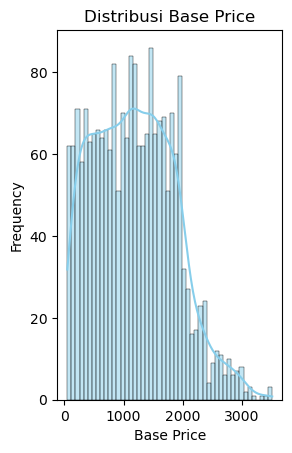

In [79]:
plt.subplot(1, 2, 1)
sns.histplot(data=sales_data, x='base_price', bins=50, kde=True, color='skyblue')
plt.title('Distribusi Base Price')
plt.xlabel('Base Price')
plt.ylabel('Frequency')

In [67]:
# Analisis sebaran data base_price
sales_data['base_price'].describe().reset_index()

,index,base_price
0,count,2102.000000
1,mean,1177.002155
2,std,684.244704
3,min,50.460000
4,25%,614.937500
5,50%,1150.210000
6,75%,1666.272500
7,max,3510.665000


In [68]:
# Cek normalitas data
age = sales_data['base_price'].dropna()
stat, p = normaltest(age)

if p > 0.05: 
    print(f"Data base_price berdistribusi normal (p-value: {p:.6f})")
else:      
    print(f"Data base_price TIDAK berdistribusi normal (p-value: {p:.6f})")

Data base_price TIDAK berdistribusi normal (p-value: 0.000000)


In [69]:
# Deteksi outliers menggunakan IQR method
q1 = sales_data['base_price'].quantile(0.25)
q3 = sales_data['base_price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = sales_data[(sales_data['base_price'] < lower_bound) | (sales_data['base_price'] > upper_bound)]
print(f"Jumlah outliers: {len(outliers)} dari {len(sales_data)} data ({len(outliers)/len(sales_data)*100:.2f}%)")

# Tampilkan contoh outliers
outliers.nlargest(5, 'base_price')[['product_category', 'base_price', 'total_sales', 'quantity']]

Jumlah outliers: 5 dari 2102 data (0.24%)


,product_category,base_price,total_sales,quantity
917,Printer,3510.665000,14042.66,4
1132,Printer,3467.053333,10401.16,3
1097,Printer,3450.025000,6900.05,2
1982,Tablet,3380.110000,6760.22,2
1456,Monitor,3314.555000,13258.22,4


## 5. Deskripsikan `base_price` per masing masing `product_category`. Tampilkan 1 angka yang memberikan deskripsi dari sales per category.

In [70]:
avg_base_price = sales_data.groupby('product_category')['base_price'].mean().sort_values(ascending=False).reset_index()
avg_base_price['base_price'] = avg_base_price['base_price'].round(2)
avg_base_price

,product_category,base_price
0,Keyboard,1243.46
1,Laptop,1228.46
2,Tablet,1217.89
3,Mouse,1208.46
4,Smartphone,1175.51
5,Monitor,1172.35
6,Printer,1162.21
7,Smartwatch,1148.09
8,Camera,1122.16
9,Headphones,1086.42


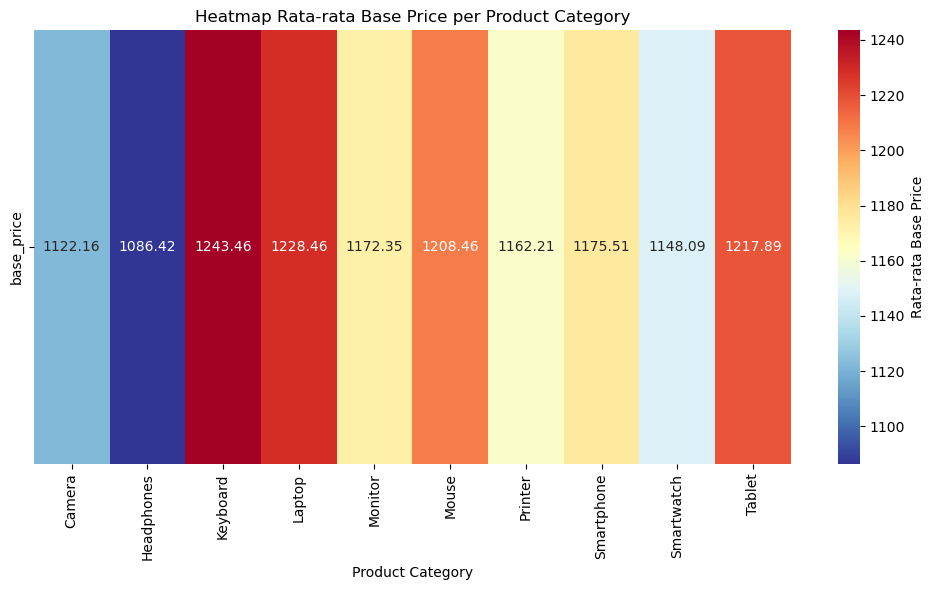

In [71]:
# Buat pivot table untuk heatmap
heatmap_data = sales_data.groupby('product_category')['base_price'].mean().reset_index()

plt.figure(figsize=(10, 6))
# Buat heatmap horizontal
sns.heatmap(heatmap_data.set_index('product_category').T, 
            annot=True, 
            fmt='.2f', 
            cmap='RdYlBu_r',
            cbar_kws={'label': 'Rata-rata Base Price'})
plt.title('Heatmap Rata-rata Base Price per Product Category')
plt.xlabel('Product Category')
plt.ylabel('')
plt.tight_layout()
plt.show()